In [1]:
# Notebook Clustering + Visualisation

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_merged = pd.read_csv('df_merged.csv')

In [4]:
df_merged

Pays  Population_2017  \
0                               Afghanistan        36296.113   
1                            Afrique du Sud        57009.756   
2                                   Albanie         2884.169   
3                                   Algérie        41389.189   
4                                 Allemagne        82658.409   
..                                      ...              ...   
169  Venezuela (République bolivarienne du)        29402.484   
170                                Viet Nam        94600.648   
171                                   Yémen        27834.819   
172                                  Zambie        16853.599   
173                                Zimbabwe        14236.595   

     Disponibilite_alimentaire_totale  
0                             15139.0  
1                             66840.0  
2                              4879.0  
3                             45365.0  
4                            174960.0  
..                                ...  
169                           21360.0  
170                          119375.0  
171                            8926.0  
172                           12219.0  
173                            9155.0  

[174 rows x 3 columns]

In [5]:
# 1. Stabilité politique
stab_politique = pd.read_csv("Stabilité_politique.csv")
stab_politique = stab_politique[['Country Name', '2017 [YR2017]']]
stab_politique.columns = ['Country Name', 'Stabilite_politique']

stab_politique.head(5)

Country Name Stabilite_politique
0     Afghanistan    -2.7949755191803
1         Albania   0.373770743608475
2         Algeria  -0.919614315032959
3  American Samoa    1.18432366847992
4         Andorra    1.39288973808289

In [6]:
# 2. Urbanisation
urban = pd.read_csv("Urban_population.csv")
urban = urban[['Country Name', '2017 [YR2017]']]
urban.columns = ['Country Name', 'Urbanisation']

urban.head(5)

Country Name Urbanisation
0     Afghanistan        25.25
1         Albania       59.383
2         Algeria       72.052
3  American Samoa        87.17
4         Andorra        88.15

In [7]:
# 3. Croissance démographique
croiss_demo = pd.read_csv("Population_growth.csv")
croiss_demo = croiss_demo[['Country Name', '2017 [YR2017]']]
croiss_demo.columns = ['Country Name', 'Croissance_demographique']

croiss_demo.head(5)

Country Name Croissance_demographique
0     Afghanistan         2.80833730805469
1         Albania      -0.0919722937442495
2         Algeria         2.03200060784518
3  American Samoa        -1.26938746413556
4         Andorra         2.16803975005007

In [8]:
# 4. Utilisation Internet
internet = pd.read_csv("Utilisation_internet.csv")
internet = internet[['Country Name', '2017 [YR2017]']]
internet.columns = ['Country Name', 'Utilisation_internet']

internet.head(5)

Country Name Utilisation_internet
0     Afghanistan                 13.5
1         Albania                 62.4
2         Algeria                 47.7
3  American Samoa                   ..
4         Andorra                 91.6

In [9]:
# 5. Surface Agricole
surface = pd.read_csv("Surface_Agricole_FAO.csv", encoding='utf-8')
surface = surface[(surface['Produit'] == "Terres agricoles") & (surface['Unité'] == "%")]
surface = surface[['Zone', 'Valeur']]
surface.columns = ['Country Name', 'Surface_agricole']

surface.head(70)

Country Name  Surface_agricole
4        Afghanistan             58.12
23    Afrique du Sud             79.42
41           Albanie             42.86
60           Algérie             17.36
80         Allemagne             47.76
...              ...               ...
1201           Fidji             17.20
1219        Finlande              7.47
1237          France             53.25
1255           Gabon              8.36
1273          Gambie             62.65

[70 rows x 2 columns]

In [10]:
# 6. Croissance PIB
croiss_pib = pd.read_csv("Croissance_PIB.csv")
croiss_pib = croiss_pib[['Country Name', '2017 [YR2017]']]
croiss_pib.columns = ['Country Name', 'Croissance_PIB']

croiss_pib.head(5)

Country Name     Croissance_PIB
0     Afghanistan    2.6470032027451
1         Albania   3.80259872019053
2         Algeria   1.50000000000003
3  American Samoa  -6.98757763975155
4         Andorra  0.346071889630295

In [11]:
# 7. PIB par habitant
pib_hab = pd.read_csv("PIB_par_Habitant.csv")
pib_hab = pib_hab[['Country Name', '2017 [YR2017]']]
pib_hab.columns = ['Country Name', 'PIB_par_habitant']

pib_hab.head(5)

Country Name PIB_par_habitant
0     Afghanistan              530
1         Albania             4290
2         Algeria             4440
3  American Samoa               ..
4         Andorra               ..

In [12]:
# 8. Facilité importation (DTF)
dtf = pd.read_csv("DTF.csv", sep=";")
dtf = dtf.rename(columns={'ï»¿Country Name': 'Country Name'})
dtf['Ease of Doing Business Scores'] = dtf['Ease of Doing Business Scores'].astype(str).str.replace(",", ".").astype(float)
dtf = dtf[~dtf['Country Name'].str.contains("-")]
dtf = dtf[['Country Name', 'Ease of Doing Business Scores']]
dtf.columns = ['Country Name', 'Facilite_importation']

dtf.head(5)

Country Name  Facilite_importation
0          Afghanistan                  44.2
1              Albania                  67.0
2              Algeria                  48.5
3               Angola                  41.2
4  Antigua and Barbuda                  59.9

In [13]:
# Noms de pays en français (issus de df_merged)
pays_fr = set(df_merged['Pays'].unique())
pays_fr

{'Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Belgique',
 'Belize',
 'Bermudes',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brunéi Darussalam',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Bélarus',
 'Bénin',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, Taiwan Province de',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Congo',
 'Costa Rica',
 'Croatie',
 'Cuba',
 "Côte d'Ivoire",
 'Danemark',
 'Djibouti',
 'Dominique',
 'El Salvador',
 'Espagne',
 'Estonie',
 'Eswatini',
 'Fidji',
 'Finlande',
 'France',
 'Fédération de Russie',
 'Gabon',
 'Gambie',
 'Ghana',
 'Grenade',
 'Grèce',
 'Guatemala',
 'Guinée',
 'Guinée-Bissau',
 'Guyana',
 'Géorgie',
 'Haïti',
 'Honduras',
 'Hongrie',
 'Inde'

In [14]:
# Noms de pays en anglais, exemple à partir de stab_politique ou un autre fichier
pays_en = set(stab_politique['Country Name'].unique())
pays_en

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia

In [15]:
# Pays non match
non_matches = [p for p in pays_fr if p not in pays_en]
non_matches

['Grenade',
 'Algérie',
 'Arménie',
 'Bulgarie',
 'Japon',
 'Fidji',
 'Turkménistan',
 'Colombie',
 'Émirats arabes unis',
 'République de Moldova',
 'Nouvelle-Zélande',
 'Irlande',
 'Macédoine du Nord',
 'République démocratique populaire lao',
 'Lituanie',
 'Sénégal',
 'Tchad',
 'Arabie saoudite',
 'Gambie',
 'Australie',
 "Côte d'Ivoire",
 'Cameroun',
 'Roumanie',
 'Haïti',
 'Maroc',
 'Afrique du Sud',
 'Sainte-Lucie',
 'Pologne',
 'Pays-Bas',
 'Éthiopie',
 'Danemark',
 'Pérou',
 'Trinité-et-Tobago',
 "États-Unis d'Amérique",
 'Finlande',
 'Brésil',
 'Lettonie',
 'Libéria',
 'Slovaquie',
 'Azerbaïdjan',
 'Bénin',
 'Israël',
 'Bélarus',
 'Indonésie',
 'Congo',
 'Serbie',
 'Dominique',
 'Brunéi Darussalam',
 'Tadjikistan',
 'Guinée-Bissau',
 'Venezuela (République bolivarienne du)',
 'Mexique',
 'Thaïlande',
 'Nouvelle-Calédonie',
 'Jamaïque',
 'Bolivie (État plurinational de)',
 'Espagne',
 'Hongrie',
 'Népal',
 'Chine - RAS de Hong-Kong',
 "Iran (République islamique d')",
 'Saint-V

In [16]:
mapping_fr_en = {
    'Allemagne': 'Germany',
    'Argentine': 'Argentina',
    'Sao Tomé-et-Principe': 'Sao Tome and Principe',
    'Équateur': 'Ecuador',
    'Jordanie': 'Jordan',
    'Turquie': 'Turkey',
    'Norvège': 'Norway',
    'Colombie': 'Colombia',
    'Autriche': 'Austria',
    'Antigua-et-Barbuda': 'Antigua and Barbuda',
    'Saint-Kitts-et-Nevis': 'St. Kitts and Nevis',
    'Albanie': 'Albania',
    'Croatie': 'Croatia',
    'Brunéi Darussalam': 'Brunei Darussalam',
    'République dominicaine': 'Dominican Republic',
    'Danemark': 'Denmark',
    'Mauritanie': 'Mauritania',
    'Saint-Vincent-et-les Grenadines': 'St. Vincent and the Grenadines',
    'Australie': 'Australia',
    'Grèce': 'Greece',
    'Namibie': 'Namibia',
    'Dominique': 'Dominica',
    'Thaïlande': 'Thailand',
    'Finlande': 'Finland',
    'Indonésie': 'Indonesia',
    'Bermudes': 'Bermuda',
    'Gambie': 'Gambia, The',
    'Grenade': 'Grenada',
    'Chine - RAS de Hong-Kong': 'Hong Kong SAR, China',
    'Chypre': 'Cyprus',
    'Afrique du Sud': 'South Africa',
    'Sénégal': 'Senegal',
    'Lituanie': 'Lithuania',
    'Îles Salomon': 'Solomon Islands',
    'République démocratique populaire lao': 'Lao PDR',
    'Brésil': 'Brazil',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Zambie': 'Zambia',
    'Nigéria': 'Nigeria',
    'Pays-Bas': 'Netherlands',
    'Roumanie': 'Romania',
    'Chine, continentale': 'China',
    'Chine, Taiwan Province de': 'Taiwan, China',
    'Bolivie (État plurinational de)': 'Bolivia',
    'République de Moldova': 'Moldova',
    'Fédération de Russie': 'Russian Federation',
    'Chine - RAS de Macao': 'Macao SAR, China',
    'Malte': 'Malta',
    'Liban': 'Lebanon',
    'République centrafricaine': 'Central African Republic',
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": 'United Kingdom',
    'Égypte': 'Egypt, Arab Rep.',
    'Malaisie': 'Malaysia',
    'Tchéquie': 'Czech Republic',
    'Nouvelle-Zélande': 'New Zealand',
    'Barbade': 'Barbados',
    'Guinée': 'Guinea',
    'Venezuela (République bolivarienne du)': 'Venezuela, RB',
    'Maroc': 'Morocco',
    'Arabie saoudite': 'Saudi Arabia',
    'Macédoine du Nord': 'North Macedonia',
    'République de Corée': 'Korea, Rep.',
    'Nouvelle-Calédonie': 'New Caledonia',
    'Azerbaïdjan': 'Azerbaijan',
    'Guinée-Bissau': 'Guinea-Bissau',
    'Polynésie française': 'French Polynesia',
    'Jamaïque': 'Jamaica',
    'Islande': 'Iceland',
    'Pérou': 'Peru',
    'Trinité-et-Tobago': 'Trinidad and Tobago',
    "Iran (République islamique d')": 'Iran, Islamic Rep.',
    'Géorgie': 'Georgia',
    'Tunisie': 'Tunisia',
    'Algérie': 'Algeria',
    'Kirghizistan': 'Kyrgyz Republic',
    'Irlande': 'Ireland',
    'Bélarus': 'Belarus',
    'République populaire démocratique de Corée': "Korea, Dem. People's Rep.",
    'Arménie': 'Armenia',
    'Émirats arabes unis': 'United Arab Emirates',
    'Espagne': 'Spain',
    'Chili': 'Chile',
    'Congo': 'Congo, Rep.',
    'Libéria': 'Liberia',
    'Italie': 'Italy',
    'Haïti': 'Haiti',
    "États-Unis d'Amérique": 'United States',
    'Ouzbékistan': 'Uzbekistan',
    'Slovaquie': 'Slovak Republic',
    'Bulgarie': 'Bulgaria',
    'Cambodge': 'Cambodia',
    'Hongrie': 'Hungary',
    'Fidji': 'Fiji',
    'Inde': 'India',
    'Cameroun': 'Cameroon',
    'Maurice': 'Mauritius',
    'Koweït': 'Kuwait',
    'Slovénie': 'Slovenia',
    'Estonie': 'Estonia',
    'Mexique': 'Mexico',
    'Turkménistan': 'Turkmenistan',
    'République-Unie de Tanzanie': 'Tanzania',
    'Bahamas': 'Bahamas, The',
    'Éthiopie': 'Ethiopia',
    'Ouganda': 'Uganda',
    'Mongolie': 'Mongolia',
    'Lettonie': 'Latvia',
    'Pologne': 'Poland',
    'Sainte-Lucie': 'St. Lucia',
    'Tchad': 'Chad',
    'Yémen': 'Yemen, Rep.',
    'Népal': 'Nepal',
    'Bosnie-Herzégovine': 'Bosnia and Herzegovina',
    'Belgique': 'Belgium',
    'Tadjikistan': 'Tajikistan',
    'Suisse': 'Switzerland',
    'Monténégro': 'Montenegro',
    'Israël': 'Israel',
    'Serbie': 'Serbia',
    'Suède': 'Sweden',
    'Soudan': 'Sudan',
    'Bénin': 'Benin',
    'Japon': 'Japan',
}

In [17]:
df_merged['Country Name'] = df_merged['Pays'].map(mapping_fr_en).fillna(df_merged['Pays'])
df_merged

Pays  Population_2017  \
0                               Afghanistan        36296.113   
1                            Afrique du Sud        57009.756   
2                                   Albanie         2884.169   
3                                   Algérie        41389.189   
4                                 Allemagne        82658.409   
..                                      ...              ...   
169  Venezuela (République bolivarienne du)        29402.484   
170                                Viet Nam        94600.648   
171                                   Yémen        27834.819   
172                                  Zambie        16853.599   
173                                Zimbabwe        14236.595   

     Disponibilite_alimentaire_totale   Country Name  
0                             15139.0    Afghanistan  
1                             66840.0   South Africa  
2                              4879.0        Albania  
3                             45365.0        Algeria  
4                            174960.0        Germany  
..                                ...            ...  
169                           21360.0  Venezuela, RB  
170                          119375.0       Viet Nam  
171                            8926.0    Yemen, Rep.  
172                           12219.0         Zambia  
173                            9155.0       Zimbabwe  

[174 rows x 4 columns]

In [18]:
surface['Country Name'] = surface['Country Name'].map(mapping_fr_en).fillna(surface['Country Name'])

In [19]:
# Liste des DataFrames 
variables = [stab_politique, urban, croiss_demo, internet, surface, croiss_pib, pib_hab, dtf]

In [20]:
# fusion dataframe
for df_var in variables:
    df_merged = df_merged.merge(df_var, on="Country Name", how="left")

In [21]:
df_merged

Pays  Population_2017  \
0                               Afghanistan        36296.113   
1                            Afrique du Sud        57009.756   
2                                   Albanie         2884.169   
3                                   Algérie        41389.189   
4                                 Allemagne        82658.409   
..                                      ...              ...   
169  Venezuela (République bolivarienne du)        29402.484   
170                                Viet Nam        94600.648   
171                                   Yémen        27834.819   
172                                  Zambie        16853.599   
173                                Zimbabwe        14236.595   

     Disponibilite_alimentaire_totale   Country Name Stabilite_politique  \
0                             15139.0    Afghanistan    -2.7949755191803   
1                             66840.0   South Africa  -0.284803628921509   
2                              4879.0        Albania   0.373770743608475   
3                             45365.0        Algeria  -0.919614315032959   
4                            174960.0        Germany   0.574381291866302   
..                                ...            ...                 ...   
169                           21360.0  Venezuela, RB    -1.2522406578064   
170                          119375.0       Viet Nam   0.211102172732353   
171                            8926.0    Yemen, Rep.   -2.93431735038757   
172                           12219.0         Zambia   0.142043307423592   
173                            9155.0       Zimbabwe  -0.710430860519409   

    Urbanisation Croissance_demographique Utilisation_internet  \
0          25.25         2.80833730805469                 13.5   
1          65.85        0.653837462693277                 56.2   
2         59.383      -0.0919722937442495                 62.4   
3         72.052         2.03200060784518                 47.7   
4         77.261        0.373724559895838                 84.4   
..           ...                      ...                  ...   
169       88.183       -0.653495206896492                 61.6   
170       35.213         1.24420473643635                 58.1   
171       36.016         3.01222786189552                 26.7   
172       42.976         3.06754137743233                 12.2   
173       32.237         1.44285382068925                 24.4   

     Surface_agricole     Croissance_PIB PIB_par_habitant  \
0               58.12    2.6470032027451              530   
1               79.42   1.15794695181735             5850   
2               42.86   3.80259872019053             4290   
3               17.36   1.50000000000003             4440   
4               47.76   2.71602451931592            43780   
..                ...                ...              ...   
169             24.38                 ..               ..   
170             38.83   6.94019037359206             2680   
171             44.42  -5.07179563883867              880   
172             32.07   3.52586277149926             1260   
173             41.82   4.08026390333053             1670   

     Facilite_importation  
0                    44.2  
1                    66.7  
2                    67.0  
3                    48.5  
4                    79.3  
..                    ...  
169                  32.1  
170                   NaN  
171                   NaN  
172                  65.7  
173                  50.5  

[174 rows x 12 columns]

In [22]:
# Statistiques descriptives
print(df_merged.describe())

       Population_2017  Disponibilite_alimentaire_totale  Surface_agricole  \
count     1.740000e+02                      1.740000e+02        171.000000   
mean      4.235212e+04                      6.349196e+04         38.648187   
std       1.522445e+05                      2.237781e+05         21.400064   
min       5.204500e+01                      4.000000e+00          0.520000   
25%       2.513328e+03                      2.703750e+03         21.540000   
50%       9.608513e+03                      1.185200e+04         39.090000   
75%       2.971320e+04                      3.258300e+04         52.875000   
max       1.421022e+06                      2.303613e+06         81.420000   

       Facilite_importation  
count            155.000000  
mean              64.390323  
std               12.409463  
min               32.100000  
25%               54.900000  
50%               65.400000  
75%               74.850000  
max               87.000000  


In [23]:
# Vérification des valeurs manquantes
print(df_merged.isnull().sum())

Pays                                 0
Population_2017                      0
Disponibilite_alimentaire_totale     0
Country Name                         0
Stabilite_politique                  4
Urbanisation                         3
Croissance_demographique             3
Utilisation_internet                 3
Surface_agricole                     3
Croissance_PIB                       3
PIB_par_habitant                     3
Facilite_importation                19
dtype: int64


In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pays                              174 non-null    object 
 1   Population_2017                   174 non-null    float64
 2   Disponibilite_alimentaire_totale  174 non-null    float64
 3   Country Name                      174 non-null    object 
 4   Stabilite_politique               170 non-null    object 
 5   Urbanisation                      171 non-null    object 
 6   Croissance_demographique          171 non-null    object 
 7   Utilisation_internet              171 non-null    object 
 8   Surface_agricole                  171 non-null    float64
 9   Croissance_PIB                    171 non-null    object 
 10  PIB_par_habitant                  171 non-null    object 
 11  Facilite_importation              155 non-null    float64
dtypes: float

In [25]:
import matplotlib.pyplot as plt

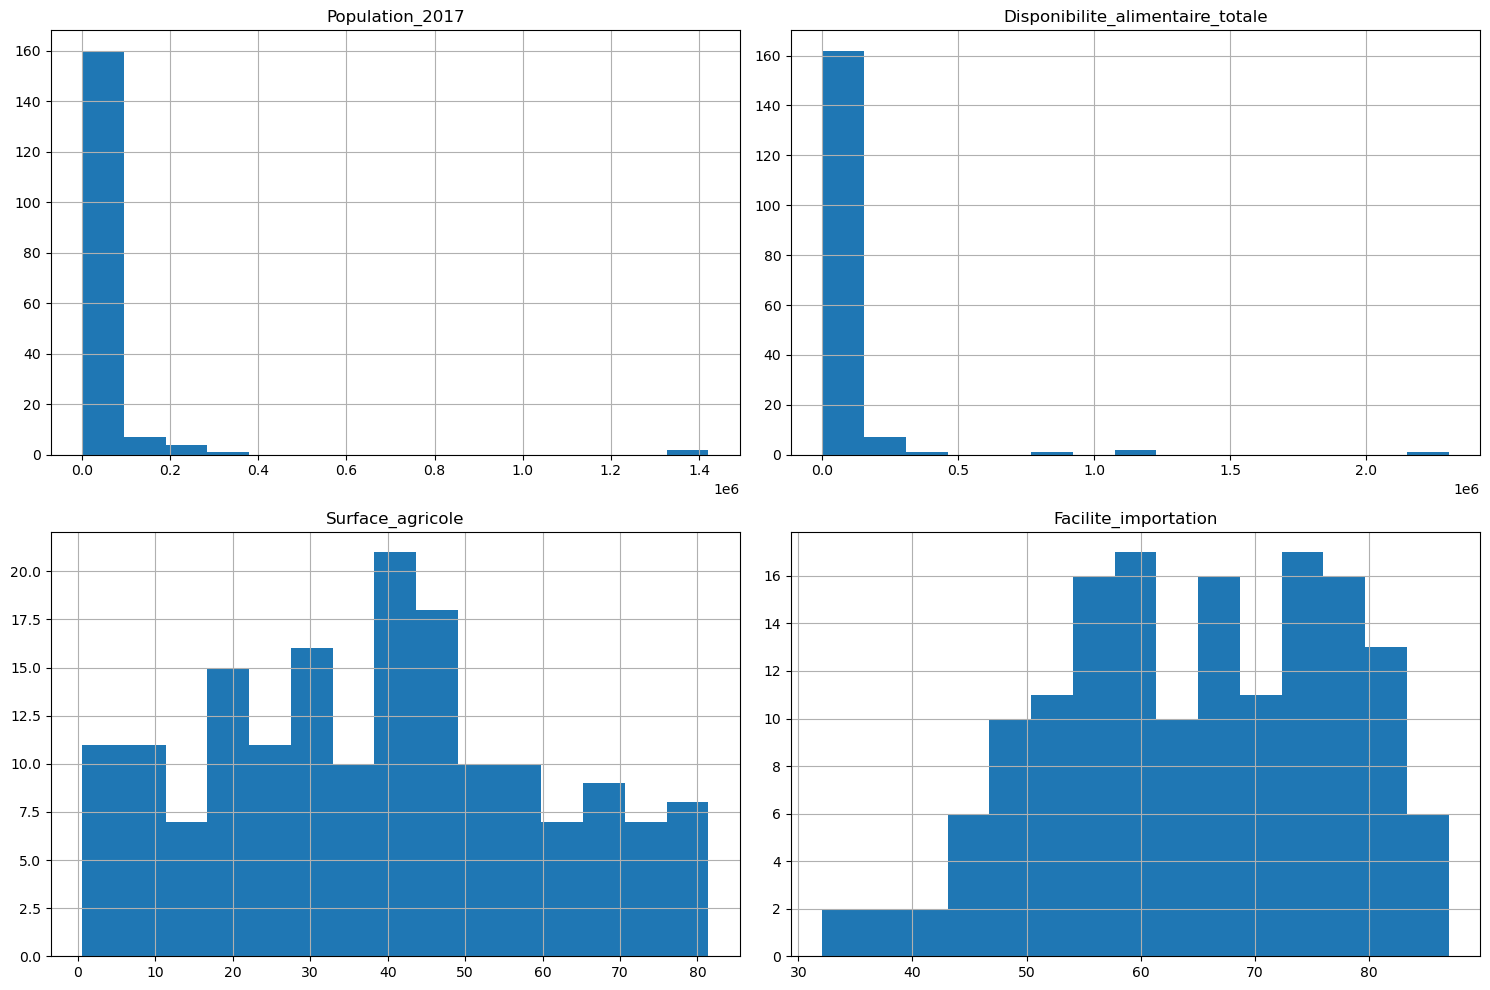

In [26]:
# Histogramme pour chaque variable numérique (sauf les colonnes 'Pays' et 'Country Name')
variables_numeriques = df_merged.select_dtypes(include=['float64', 'int64']).columns
df_merged[variables_numeriques].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

In [27]:
# On retire les colonnes d'identité
cols_a_exclure = ['Pays', 'Country Name'] 
variables_acp = df_merged.drop(columns=cols_a_exclure)

print("Colonnes utilisées pour l'ACP :", variables_acp.columns.tolist())

Colonnes utilisées pour l'ACP : ['Population_2017', 'Disponibilite_alimentaire_totale', 'Stabilite_politique', 'Urbanisation', 'Croissance_demographique', 'Utilisation_internet', 'Surface_agricole', 'Croissance_PIB', 'PIB_par_habitant', 'Facilite_importation']


In [28]:
# Remplacer toutes les valeurs '..' par NaN
variables_acp = variables_acp.replace('..', np.nan)

In [29]:
# S'assurer que tout est bien au format float
variables_acp = variables_acp.apply(pd.to_numeric, errors='coerce')

In [30]:
variables_acp = variables_acp.dropna()

In [31]:
df_merged_clean = df_merged.loc[variables_acp.index]

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(variables_acp)

C:\Users\David\AppData\Local\Temp\ipykernel_34732\998728581.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


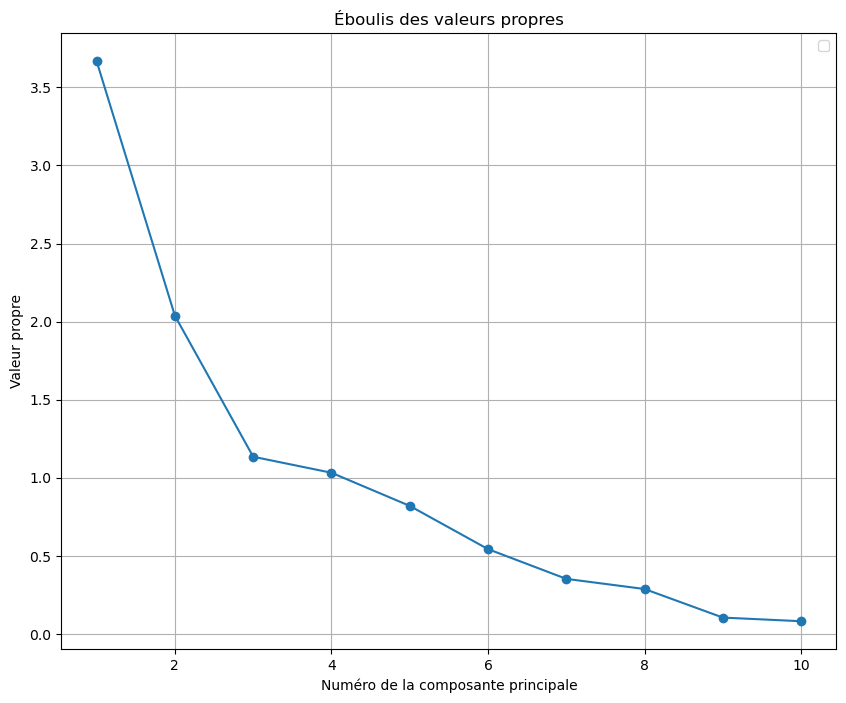

In [33]:
#ACP sans réduire le nombre de composantes
pca = PCA()
X_pca = pca.fit_transform(X_std)

#Éboulis des valeurs propres (méthode du coude)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
eigenvalues = pca.explained_variance_
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
ax.set_xlabel('Numéro de la composante principale')
ax.set_ylabel('Valeur propre')
ax.set_title('Éboulis des valeurs propres')
ax.legend()
ax.grid(True)

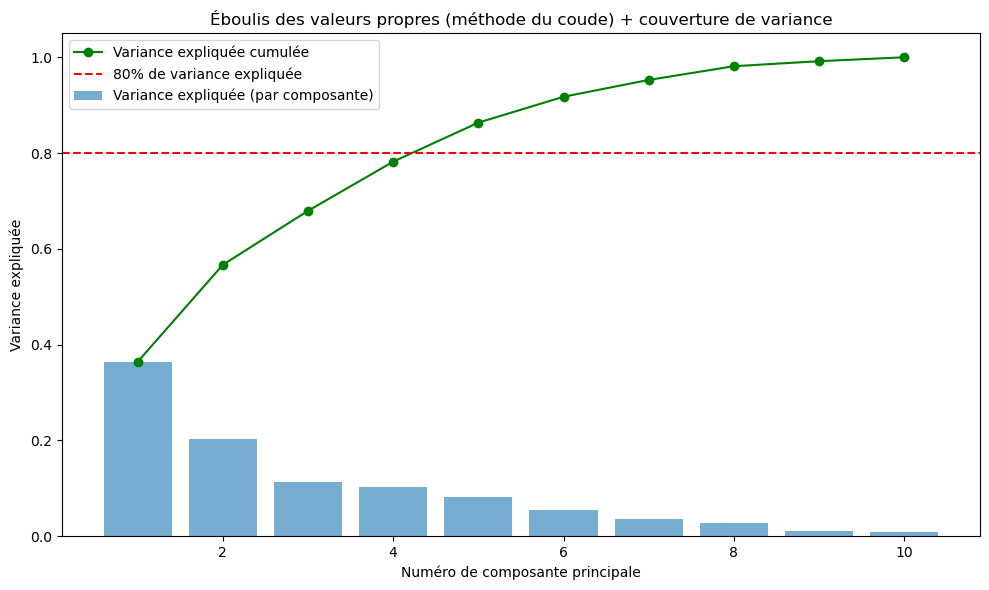

In [34]:
# Variance expliquée cumulée
plt.figure(figsize=(10, 6))

# Barplot des variances expliquées par composante
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.6, label="Variance expliquée (par composante)")

# Courbe de la variance expliquée cumulée
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='green', label="Variance expliquée cumulée")

# Ligne horizontale 80%
plt.axhline(0.8, color='red', linestyle='--', label="80% de variance expliquée")

plt.xlabel('Numéro de composante principale')
plt.ylabel('Variance expliquée')
plt.title("Éboulis des valeurs propres (méthode du coude) + couverture de variance")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
print("Variance expliquée (%) :", 100 * pca.explained_variance_ratio_)
print("Variance expliquée cumulée (%) :", 100 * pca.explained_variance_ratio_.cumsum())

Variance expliquée (%) : [36.42830943 20.24280536 11.27674509 10.25857687  8.15068604  5.4017526
  3.5100927   2.86498129  1.04872098  0.81732964]
Variance expliquée cumulée (%) : [ 36.42830943  56.67111479  67.94785988  78.20643675  86.35712279
  91.75887539  95.26896808  98.13394937  99.18267036 100.        ]


In [36]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

In [37]:
variables = variables_acp.columns 
loadings = pd.DataFrame(pca.components_.T,columns=[f'PC{i+1}' for i in range(5)],index=variables)
loadings

PC1       PC2       PC3       PC4  \
Population_2017                  -0.050873  0.665948 -0.196091 -0.011346   
Disponibilite_alimentaire_totale -0.003128  0.664520 -0.223080 -0.049750   
Stabilite_politique               0.374616 -0.102874 -0.054356  0.369090   
Urbanisation                      0.394987  0.032214 -0.106574 -0.230871   
Croissance_demographique         -0.255179 -0.116671 -0.502894  0.191393   
Utilisation_internet              0.498225  0.009217  0.015837 -0.062065   
Surface_agricole                 -0.111092  0.202040  0.698610 -0.217598   
Croissance_PIB                   -0.136740  0.153565  0.260790  0.823911   
PIB_par_habitant                  0.424451  0.010094 -0.171886  0.127064   
Facilite_importation              0.420128  0.158444  0.242292  0.158305   

                                       PC5  
Population_2017                  -0.065842  
Disponibilite_alimentaire_totale -0.066841  
Stabilite_politique              -0.229415  
Urbanisation                      0.366558  
Croissance_demographique          0.657091  
Utilisation_internet              0.017652  
Surface_agricole                  0.491247  
Croissance_PIB                    0.116111  
PIB_par_habitant                  0.337915  
Facilite_importation              0.055939

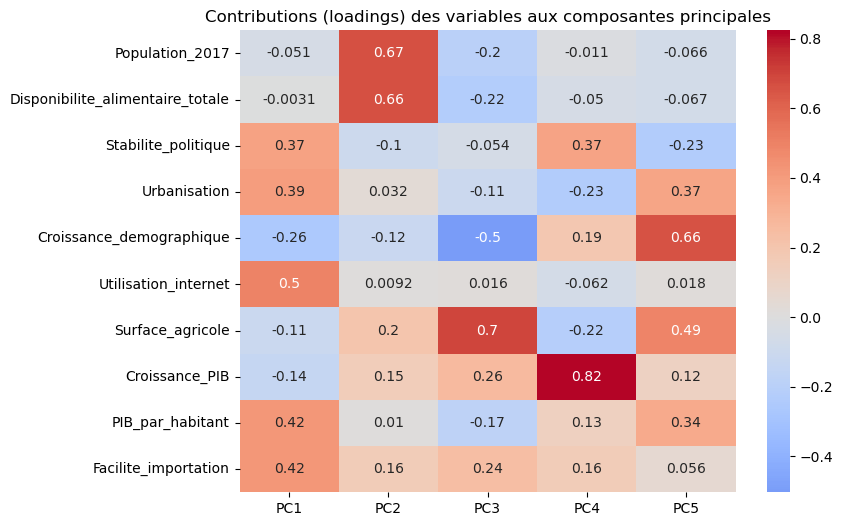

In [38]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Contributions (loadings) des variables aux composantes principales")
plt.show()

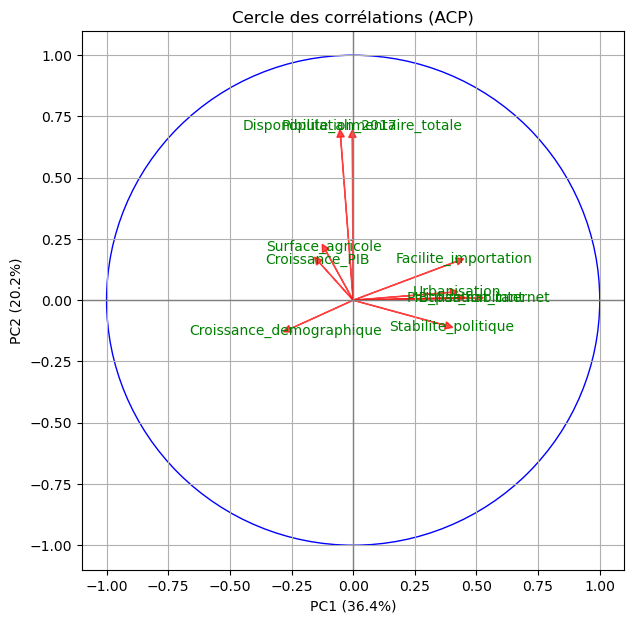

In [39]:
# ACP

import matplotlib.pyplot as plt
import numpy as np
loadings = pca.components_.T[:, :5] 
variable_names = variables_acp.columns

plt.figure(figsize=(7,7))
circle = plt.Circle((0,0), 1, color='b', fill=False)
plt.gca().add_artist(circle)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)


for i, var in enumerate(variable_names):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.7, head_width=0.03, head_length=0.03)
    plt.text(loadings[i,0]*1.07, loadings[i,1]*1.07, var, color='g', ha='center', va='center')

plt.xlabel("PC1 (%.1f%%)" % (100*pca.explained_variance_ratio_[0]))
plt.ylabel("PC2 (%.1f%%)" % (100*pca.explained_variance_ratio_[1]))
plt.title("Cercle des corrélations (ACP)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.show()

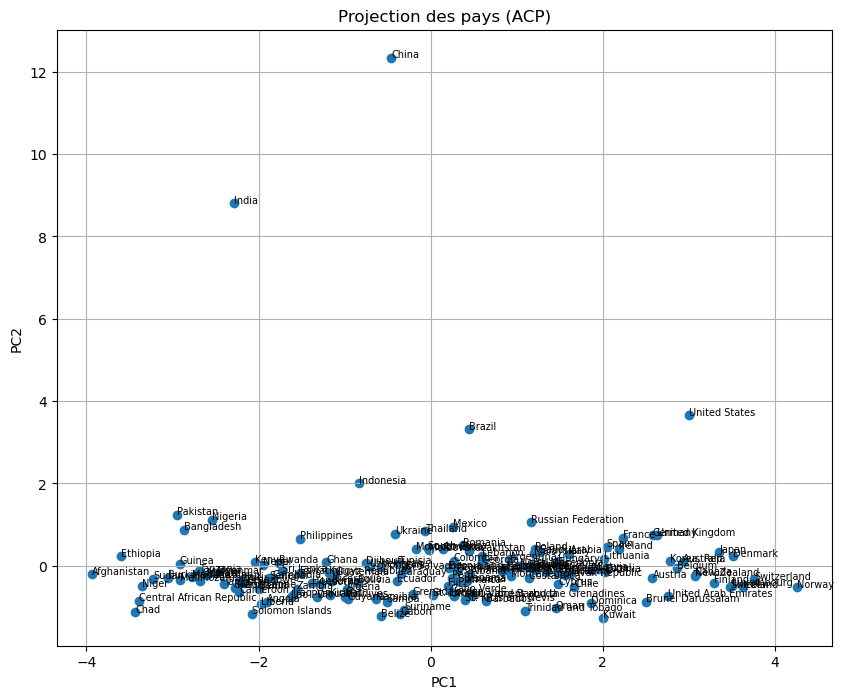

In [40]:
#Projection des pays sur ACP

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1])

for i, nom in enumerate(df_merged.loc[variables_acp.index, 'Country Name']):
    plt.text(X_pca[i,0], X_pca[i,1], nom, fontsize=7,)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des pays (ACP)')
plt.grid(True)
plt.show()

In [41]:
# Variables pour le clustering
variables_clustering = ['Population_2017','Disponibilite_alimentaire_totale','Stabilite_politique','Urbanisation','Croissance_demographique','Utilisation_internet','Surface_agricole','Croissance_PIB','PIB_par_habitant','Facilite_importation']

In [42]:
# Retire les lignes manquantes
df_clust = df_merged_clean.dropna(subset=variables_clustering)

In [43]:
# Standardise les variables
scaler = StandardScaler()
X_clust = scaler.fit_transform(df_clust[variables_clustering])

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_clust, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(
    Z,
    labels=df_clust['Country Name'].values,
    leaf_rotation=90
)
plt.title('Dendrogramme (CAH)')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [45]:
from scipy.cluster.hierarchy import fcluster, linkage
# Attribution des clusters (5 groupes)
labels = fcluster(Z, 5, criterion='maxclust')
df_merged_clean['Cluster_CAH'] = labels

In [46]:
# Variable que l'on va utiliser
variables_analyse = ['Population_2017', 'Disponibilite_alimentaire_totale', 'Stabilite_politique',
                     'Urbanisation', 'Croissance_demographique', 'Utilisation_internet',
                     'Surface_agricole', 'Croissance_PIB', 'PIB_par_habitant', 'Facilite_importation']

In [47]:
for col in variables_analyse:
    df_merged_clean[col] = pd.to_numeric(df_merged_clean[col], errors='coerce')

In [48]:
profil = df_merged_clean.groupby('Cluster_CAH')[variables_analyse].mean()
effectifs = df_merged_clean['Cluster_CAH'].value_counts().sort_index()

print("Moyennes par cluster :")
print(profil)
print("\nEffectifs :")
print(effectifs)

Moyennes par cluster :
             Population_2017  Disponibilite_alimentaire_totale  \
Cluster_CAH                                                      
1               3.188522e+04                      2.910441e+04   
2               8.515169e+03                      8.589792e+03   
3               1.379849e+06                      1.742482e+06   
4               2.382763e+04                      4.537508e+04   
5               4.157558e+04                      1.066701e+05   

             Stabilite_politique  Urbanisation  Croissance_demographique  \
Cluster_CAH                                                                
1                      -0.621266     37.414891                  2.142956   
2                       0.113366     51.548958                  1.218152   
3                      -0.503329     45.780000                  0.883821   
4                       0.008511     66.446187                  0.237105   
5                       0.694865     83.682310            

In [49]:
for col in variables_analyse:
    df_merged_clean[col] = pd.to_numeric(df_merged_clean[col], errors='coerce')

In [50]:
# Liste des pays par cluster 
for i in range(1, 6):
    print(f"\nCluster {i} :")
    print(df_merged_clean[df_merged_clean['Cluster_CAH'] == i]['Country Name'].values)


Cluster 1 :
['Afghanistan' 'Bangladesh' 'Benin' 'Bolivia' 'Burkina Faso' 'Cambodia'
 'Ecuador' 'Eswatini' 'Ethiopia' 'Ghana' 'Guatemala' 'Guinea' 'Haiti'
 'Honduras' 'Solomon Islands' 'Kenya' 'Kyrgyz Republic' 'Kiribati'
 'Lesotho' 'Madagascar' 'Malawi' 'Maldives' 'Mali' 'Mauritania'
 'Mozambique' 'Myanmar' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Uzbekistan'
 'Pakistan' 'Philippines' 'Central African Republic' 'Lao PDR' 'Tanzania'
 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan' 'Sri Lanka' 'Tajikistan' 'Togo'
 'Vanuatu' 'Zambia' 'Zimbabwe']

Cluster 2 :
['Algeria' 'Angola' 'Antigua and Barbuda' 'Barbados' 'Belize' 'Cabo Verde'
 'Cameroon' 'Dominica' 'Fiji' 'Gabon' 'Grenada' 'Guyana' 'Iraq' 'Jordan'
 'Liberia' 'Namibia' 'Peru' 'St. Lucia' 'St. Kitts and Nevis'
 'St. Vincent and the Grenadines' 'Samoa' 'Suriname' 'Chad'
 'Trinidad and Tobago']

Cluster 3 :
['China' 'India']

Cluster 4 :
['South Africa' 'Albania' 'Saudi Arabia' 'Argentina' 'Armenia'
 'Azerbaijan' 'Belarus' 'Bosnia and Herzegov

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_std)   # X_std = tes données standardisées

# Pour les centroïdes :
centroids = kmeans.cluster_centers_

C:\Users\David\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\David\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\David\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\David\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\David\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

In [52]:
# variables_clustering = la liste des noms de colonnes utilisées dans le clustering
centroids_df = pd.DataFrame(centroids, columns=variables_clustering)
print(centroids_df)

   Population_2017  Disponibilite_alimentaire_totale  Stabilite_politique  \
0        -0.154189                         -0.169864            -0.217471   
1        -0.147418                         -0.066569             0.199008   
2        -0.072957                         -0.000712             0.948759   
3        -0.041694                         -0.151113            -0.848098   
4         8.168107                          6.971695            -0.534107   

   Urbanisation  Croissance_demographique  Utilisation_internet  \
0     -0.375403                  0.646993             -0.729761   
1      0.275890                 -0.826410              0.475328   
2      1.150304                  0.135933              1.306354   
3     -0.996950                  0.768214             -1.147716   
4     -0.563268                 -0.242291             -0.674398   

   Surface_agricole  Croissance_PIB  PIB_par_habitant  Facilite_importation  
0         -0.784102       -0.144751         -0.558001   

In [53]:
cols = ['Population_2017', 'Disponibilite_alimentaire_totale', 'Stabilite_politique','Urbanisation', 'Utilisation_internet', 'Surface_agricole','Croissance_PIB', 'PIB_par_habitant', 'Facilite_importation']

In [54]:
cluster_label = 5
df_cluster = df_merged_clean[df_merged_clean['Cluster_CAH'] == cluster_label]

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[cols])

In [56]:
# DataFrame standardisé
df_scaled = pd.DataFrame(X_scaled, columns=cols, index=df_cluster.index)

# Score neutre : moyenne sur toutes les colonnes
df_cluster['Score_Neutre'] = df_scaled.mean(axis=1)

C:\Users\David\AppData\Local\Temp\ipykernel_34732\950127961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Score_Neutre'] = df_scaled.mean(axis=1)


In [57]:
df_cluster = df_cluster.sort_values('Score_Neutre', ascending=False)
print(df_cluster[['Country Name', 'Score_Neutre']].head(10))

       Country Name  Score_Neutre
54    United States      0.973085
44          Denmark      0.537496
79          Iceland      0.435952
95       Luxembourg      0.374975
139  United Kingdom      0.324276
118     New Zealand      0.323205
116          Norway      0.242335
78          Ireland      0.237931
83            Japan      0.231524
10        Australia      0.204818


In [58]:
variables_to_rank = ['Population_2017', 'Disponibilite_alimentaire_totale',
    'Stabilite_politique', 'Urbanisation',
    'Croissance_demographique', 'Utilisation_internet',
    'Surface_agricole', 'Croissance_PIB',
    'PIB_par_habitant', 'Facilite_importation']

df_merged_clean['Score_moyen'] = df_merged_clean[variables_to_rank].mean(axis=1)
df_global_ranking = df_merged_clean.sort_values('Score_moyen', ascending=False)
print(df_global_ranking[['Country Name', 'Score_moyen']].head(10))  

           Country Name    Score_moyen
35                China  373355.399089
74                India  252200.354868
24               Brazil  130293.814317
54        United States  123433.877640
75            Indonesia   71167.946918
56   Russian Federation   45423.930841
122            Pakistan   40398.940081
115             Nigeria   40263.664388
106              Mexico   33293.736155
4               Germany   30169.079413


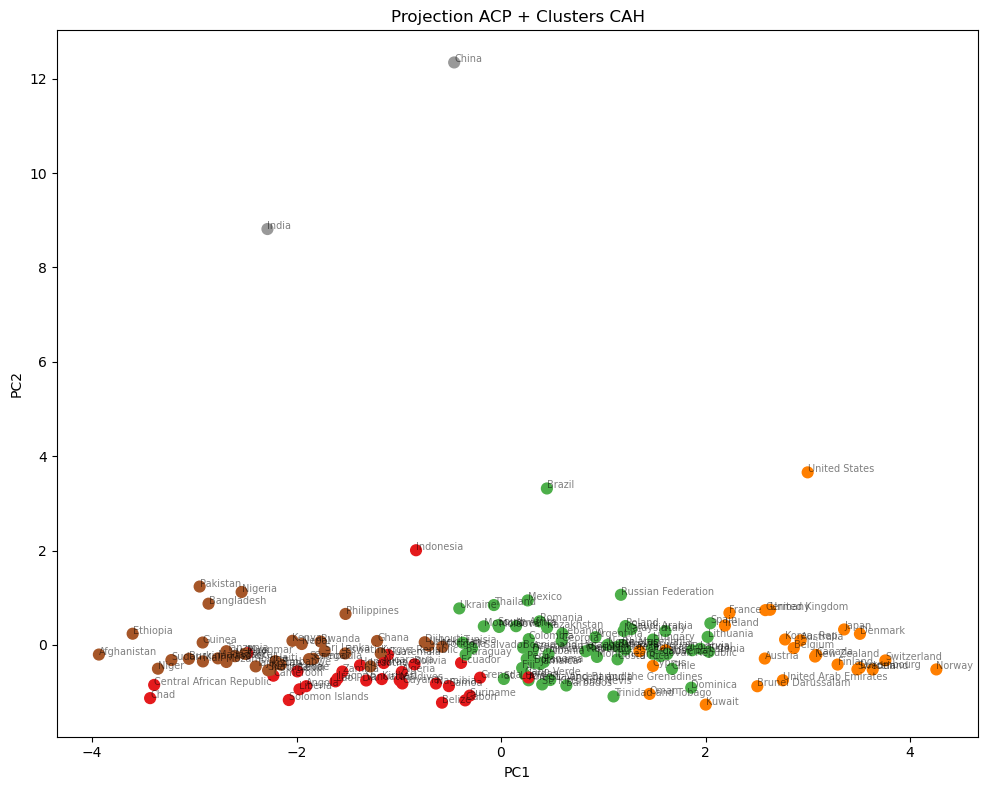

In [59]:
from mpl_toolkits.mplot3d import Axes3D

# Projection ACP 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=60)
for i, country in enumerate(df_merged_clean['Country Name']):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=7, alpha=0.5)
plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.title("Projection ACP + Clusters CAH")
plt.tight_layout()
plt.show()

In [60]:
# - Chine et Inde
pays_a_enlever = ['China', 'India']
df_proj = df_merged_clean[~df_merged_clean['Country Name'].isin(pays_a_enlever)].copy()
df_proj = df_proj.reset_index(drop=True)

In [61]:
variables_analyse = ['Population_2017', 'Disponibilite_alimentaire_totale', 'Stabilite_politique',
    'Urbanisation', 'Croissance_demographique', 'Utilisation_internet',
    'Surface_agricole', 'Croissance_PIB', 'PIB_par_habitant', 'Facilite_importation']

# Standardisation
scaler = StandardScaler()
X_std = scaler.fit_transform(df_proj[variables_analyse])

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [63]:
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(X_std, method='ward')
labels = fcluster(Z, 4, criterion='maxclust')

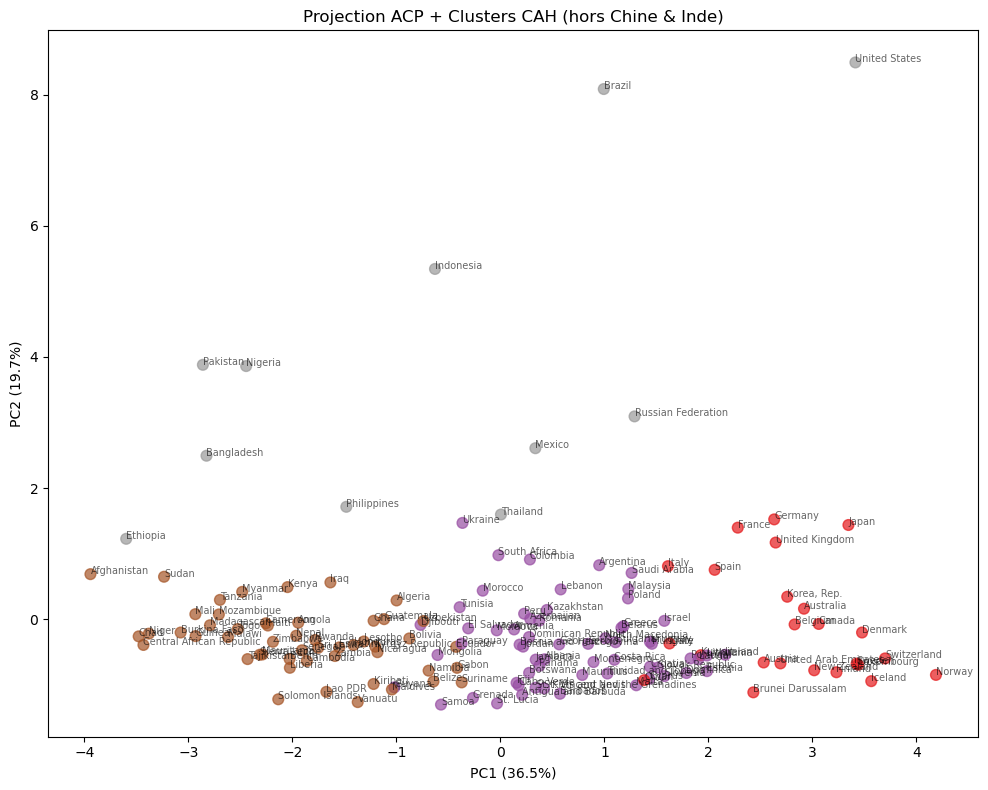

In [64]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', s=60, alpha=0.7)
for i, country in enumerate(df_proj['Country Name']):
    plt.text(X_pca[i,0], X_pca[i,1], country, fontsize=7, alpha=0.6)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Projection ACP + Clusters CAH (hors Chine & Inde)")
plt.tight_layout()
plt.show()

In [65]:
pays_a_enlever = ['China', 'India']
df_clean = df_merged_clean[~df_merged_clean['Country Name'].isin(pays_a_enlever)].copy()
df_clean = df_clean.reset_index(drop=True)

In [66]:
df_clean

Pays  Population_2017  Disponibilite_alimentaire_totale  \
0       Afghanistan        36296.113                           15139.0   
1    Afrique du Sud        57009.756                           66840.0   
2           Albanie         2884.169                            4879.0   
3           Algérie        41389.189                           45365.0   
4         Allemagne        82658.409                          174960.0   
..              ...              ...                               ...   
142         Ukraine        44487.709                          100926.0   
143         Uruguay         3436.641                            4440.0   
144         Vanuatu          285.510                             443.0   
145          Zambie        16853.599                           12219.0   
146        Zimbabwe        14236.595                            9155.0   

     Country Name  Stabilite_politique  Urbanisation  \
0     Afghanistan            -2.794976        25.250   
1    South Africa            -0.284804        65.850   
2         Albania             0.373771        59.383   
3         Algeria            -0.919614        72.052   
4         Germany             0.574381        77.261   
..            ...                  ...           ...   
142       Ukraine            -1.867418        69.246   
143       Uruguay             1.040092        95.240   
144       Vanuatu             0.676285        25.163   
145        Zambia             0.142043        42.976   
146      Zimbabwe            -0.710431        32.237   

     Croissance_demographique  Utilisation_internet  Surface_agricole  \
0                    2.808337                  13.5             58.12   
1                    0.653837                  56.2             79.42   
2                   -0.091972                  62.4             42.86   
3                    2.032001                  47.7             17.36   
4                    0.373725                  84.4             47.76   
..                        ...                   ...               ...   
142                 -0.397113                  58.9             71.62   
143                  0.270549                  70.3             81.26   
144                  2.332133                  30.8             15.34   
145                  3.067541                  12.2             32.07   
146                  1.442854                  24.4             41.82   

     Croissance_PIB  PIB_par_habitant  Facilite_importation  Cluster_CAH  \
0          2.647003               530                  44.2            1   
1          1.157947              5850                  66.7            4   
2          3.802599              4290                  67.0            4   
3          1.500000              4440                  48.5            2   
4          2.716025             43780                  79.3            5   
..              ...               ...                   ...          ...   
142        2.359972              2330                  69.1            4   
143        1.740376             16720                  61.4            4   
144        6.317305              2980                  60.7            1   
145        3.525863              1260                  65.7            1   
146        4.080264              1670                  50.5            1   

      Score_moyen  
0     5210.884336  
1    12996.945298  
2     1228.889640  
3     9138.241339  
4    30169.079413  
..            ...  
142  14801.267044  
143   2490.789202  
144    384.983872  
145   3049.228045  
146   2521.536469  

[147 rows x 14 columns]

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


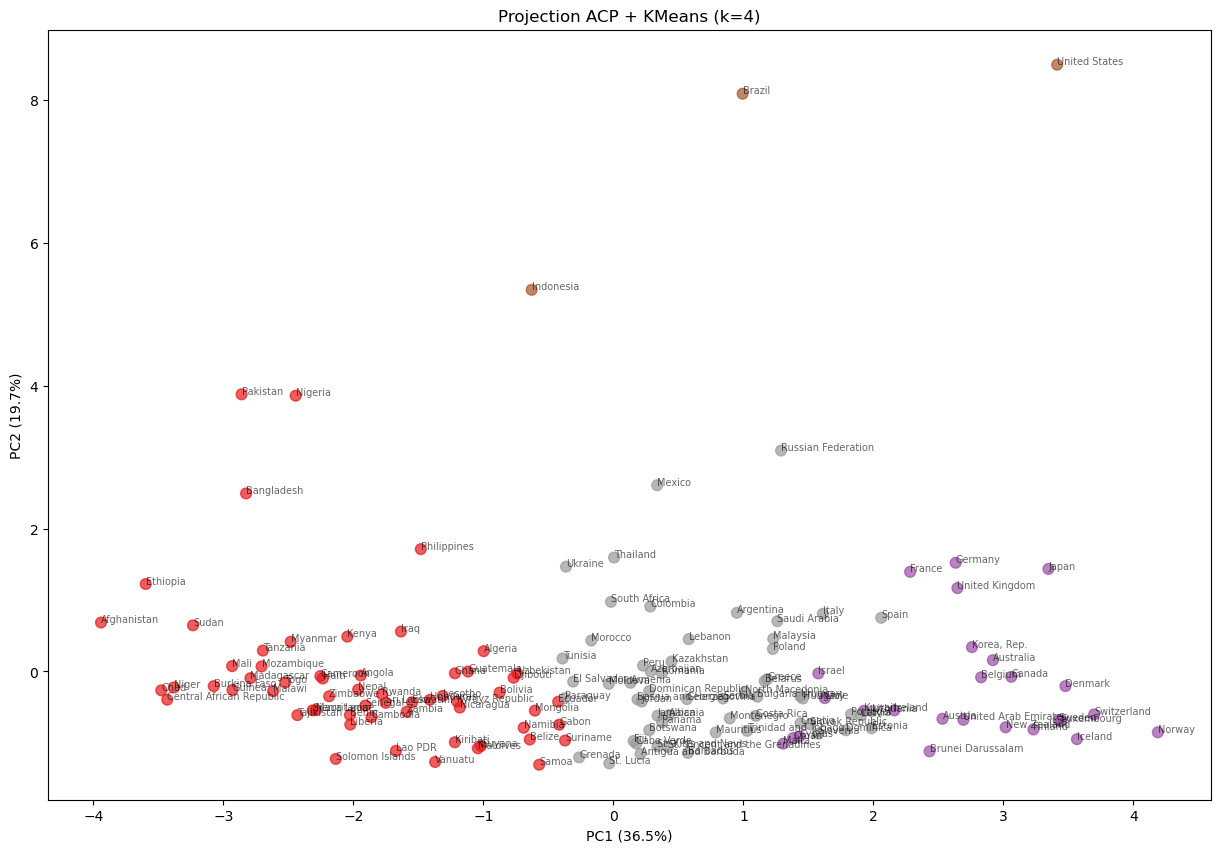

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


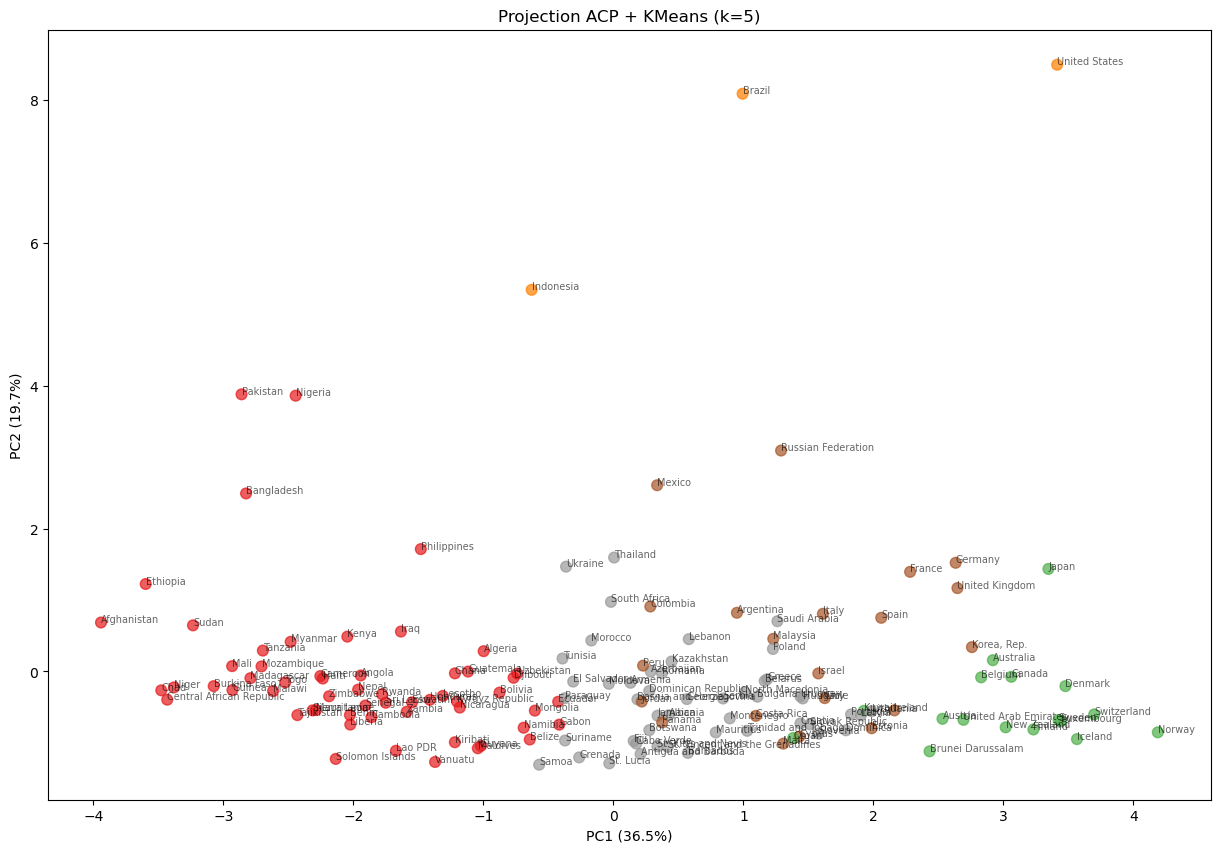

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_std)
    df_clean[f'Cluster_KMeans_{k}'] = labels_kmeans
    
    plt.figure(figsize=(15,10))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='Set1', s=60, alpha=0.7)
    for i, country in enumerate(df_clean['Country Name']):
        plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=7, alpha=0.6)
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title(f"Projection ACP + KMeans (k={k})")
    plt.show()

In [68]:
from sklearn.metrics import silhouette_score
scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_std)
    score = silhouette_score(X_std, labels)
    scores.append(score)
    print(f'k={k}, Silhouette Score: {score:.3f}')

k=2, Silhouette Score: 0.247
k=3, Silhouette Score: 0.264
k=4, Silhouette Score: 0.222
k=5, Silhouette Score: 0.179
k=6, Silhouette Score: 0.192
k=7, Silhouette Score: 0.202
k=8, Silhouette Score: 0.165
k=9, Silhouette Score: 0.169


C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [69]:
# Visualisation du score
plt.figure(figsize=(7,4))
plt.plot(list(k_range), scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette score moyen')
plt.title('Silhouette scores pour différents k (KMeans)')
plt.grid(True)
plt.show()

In [70]:
#DataFrame SANS la Chine ni l'Inde
countries_to_drop = ['China', 'India']
df_kmeans = df_merged_clean[~df_merged_clean['Country Name'].isin(countries_to_drop)].copy()

In [71]:
#Standardise
from sklearn.preprocessing import StandardScaler
cols_for_ranking = ['Population_2017', 'Disponibilite_alimentaire_totale', 'Stabilite_politique',
    'Urbanisation', 'Croissance_demographique', 'Utilisation_internet',
    'Surface_agricole', 'Croissance_PIB', 'PIB_par_habitant', 'Facilite_importation']
scaler = StandardScaler()
X_std = scaler.fit_transform(df_kmeans[cols_for_ranking])

In [72]:
# KMeans sur X_std
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_std)

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
# Résultat dans df_kmeans
df_kmeans['Cluster_KMeans'] = labels_kmeans
df_kmeans['Score_KMeans'] = df_kmeans[cols_for_ranking].mean(axis=1)

In [74]:
#Ranking
for cluster_label in range(k):
    print(f"\n--- Top pays pour le cluster KMeans {cluster_label} ---")
    df_cluster = df_kmeans[df_kmeans['Cluster_KMeans'] == cluster_label]
    ranking = df_cluster[['Country Name', 'Score_KMeans']].sort_values(by='Score_KMeans', ascending=False)
    print(ranking.head(10))


--- Top pays pour le cluster KMeans 0 ---
    Country Name  Score_KMeans
122     Pakistan  40398.940081
115      Nigeria  40263.664388
14    Bangladesh  26488.904954
127  Philippines  22882.935700
55      Ethiopia  16309.680620
110      Myanmar  12480.976932
137     Tanzania   9964.262555
3        Algeria   9138.241339
86         Kenya   8332.431765
63         Ghana   7763.668829

--- Top pays pour le cluster KMeans 1 ---
           Country Name  Score_KMeans
56   Russian Federation  45423.930841
106              Mexico  33293.736155
4               Germany  30169.079413
83                Japan  27614.276359
59               France  27253.687852
159            Thailand  26093.597577
139      United Kingdom  20331.752056
8             Argentina  19562.423129
81                Italy  18600.106175
98             Malaysia  17325.327159

--- Top pays pour le cluster KMeans 2 ---
     Country Name   Score_KMeans
24         Brazil  130293.814317
54  United States  123433.877640
75      Indon

In [75]:
# Save DataFrame df_merged_clean
df_merged_clean.to_csv("df_merged_clean.csv", index=False, encoding='utf-8')